In [92]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [93]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
adam = Adam(lr=2e-4,beta_1=0.5)

In [94]:
noise_size = 30
X = x_train.astype(float) / 255
X_test = x_test.astype(float) / 255

In [95]:
in_layer = Input(shape=(noise_size,))
dense = Dense(units=100,activation="tanh")(in_layer)
dense = Dense(units=400,activation="tanh")(dense)
dense = Dense(units=784,activation="tanh")(dense)
out_layer = Reshape(target_shape=(28,28))(dense)

In [96]:
gen = Model(in_layer,out_layer)

In [97]:
gen.compile(optimizer=adam, loss="binary_crossentropy")
gen.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 30)]              0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_29 (Dense)             (None, 400)               40400     
_________________________________________________________________
dense_30 (Dense)             (None, 784)               314384    
_________________________________________________________________
reshape_8 (Reshape)          (None, 28, 28)            0         
Total params: 357,884
Trainable params: 357,884
Non-trainable params: 0
_________________________________________________________________


In [98]:
in_layer = Input(shape=(28,28,))
reshape = Reshape(target_shape=(784,))(in_layer)
dense = Dense(units=400,activation="tanh")(reshape)
dense = Dense(units=100,activation="tanh")(dense)
dense = Dense(units=10,activation="tanh")(dense)
out_layer = Dense(units=1,activation="sigmoid")(dense)


In [99]:
disc = Model(in_layer,out_layer)


disc.compile(optimizer=adam, loss="binary_crossentropy")

disc.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
reshape_9 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_32 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 11        
Total params: 355,121
Trainable params: 355,121
Non-trainable params: 0
____________________________________________________

In [100]:
def display(image):
    plt.figure(figsize=(5,5))
    for i in range(1,26):
        plt.subplot(5,5,i)
        plt.imshow(image[i],cmap="gray")
    plt.show()



In [101]:
in_layer = Input(shape=(30,))
gen_layer = gen(in_layer)
disc_layer = disc(gen_layer)

In [102]:
gan = Model(in_layer,disc_layer)

In [103]:
gan.compile(optimizer=adam, loss="binary_crossentropy")

In [104]:
gan.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 30)]              0         
_________________________________________________________________
model_15 (Model)             (None, 28, 28)            357884    
_________________________________________________________________
model_16 (Model)             (None, 1)                 355121    
Total params: 713,005
Trainable params: 713,005
Non-trainable params: 0
_________________________________________________________________


0
100
200
300
400
500
600
700
800
900


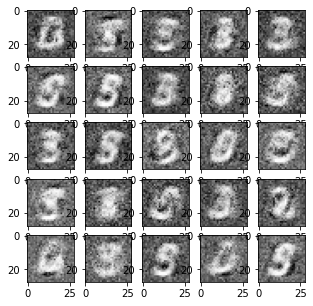

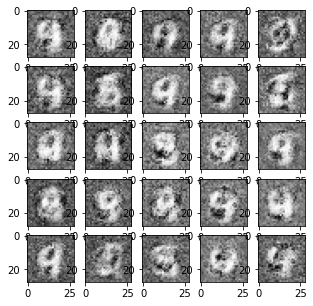

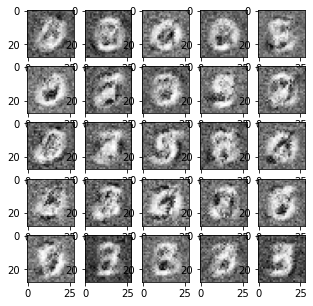

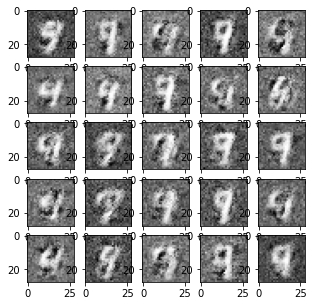

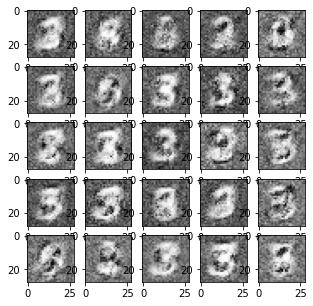

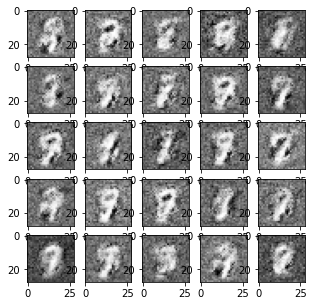

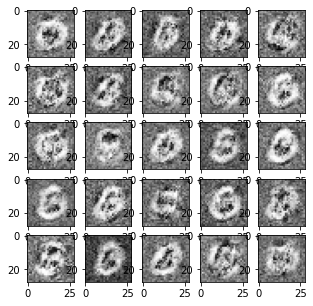

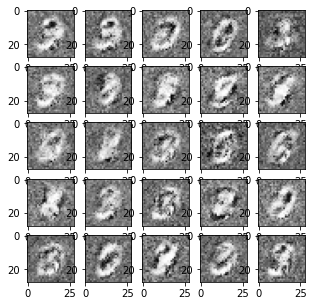

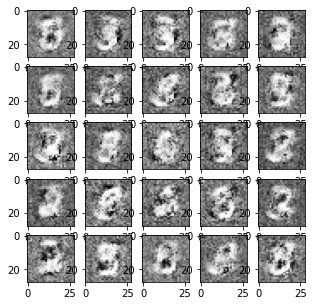

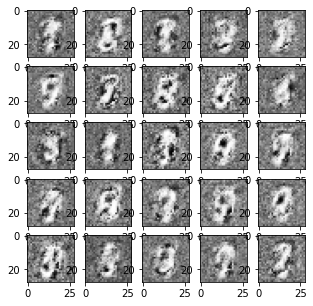

In [107]:
for i in range(1000
               ):
    noise = np.random.randn(1000,noise_size)
    fake_images = gen.predict(noise)
    real_images = X[np.random.randint(0,len(X),1000)]

    disc.trainable = True

    disc.fit(fake_images, np.zeros([1000]),verbose=0)
    disc.fit(real_images, np.ones([1000]),verbose = 0)

    disc.trainable = False

    gan.fit(noise, np.ones([1000]) * .9,verbose = 0)

    if i % 100 == 0 :
        print(i)
        display(fake_images)

In [106]:
noise = np.random.randn(1000,noise_size)


